# Keyword classification : high , medium and low suicide rate countries

#### Use word embedding and explore semantic gradienr

## Insight  1:

#### 

## Insight 2:



## Prepare Keywords data

In [1]:
import os, pathlib, shutil, random
import tensorflow as tf
from tensorflow import keras

batch_size = 100
train_ds = keras.utils.text_dataset_from_directory("kwdsuic/kwd_per_paper/train", batch_size=batch_size, label_mode="categorical", shuffle=True,
                                                  labels="inferred", class_names=["C2","C4","C5","C6","C7","C8","C9","C10"] )

#val_ds = keras.utils.text_dataset_from_directory("kwdsuic/train", batch_size=batch_size, label_mode="categorical")
#test_ds = keras.utils.text_dataset_from_directory("kwdsuic/train", batch_size=batch_size, label_mode="categorical")

2024-02-10 21:28:18.416360: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-10 21:28:18.416469: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-10 21:28:18.460777: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-10 21:28:18.551533: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-10 21:28:19.585429: W tensorflow/compiler/tf2

Found 29043 files belonging to 8 classes.


2024-02-10 21:28:22.010423: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-02-10 21:28:22.010451: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: Erin
2024-02-10 21:28:22.010458: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: Erin
2024-02-10 21:28:22.010566: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.154.5
2024-02-10 21:28:22.010585: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.154.5
2024-02-10 21:28:22.010590: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.154.5


#### Inspect the dataset read from directory files 
Displaying the shapes and dtypes of the first batch

In [2]:
for inputs, targets in train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

inputs.shape: (100,)
inputs.dtype: <dtype: 'string'>
targets.shape: (100, 8)
targets.dtype: <dtype: 'float32'>
inputs[0]: tf.Tensor(b'personal_decisions young_adult_deaths teenager_deaths proactivedecisions', shape=(), dtype=string)
targets[0]: tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0.], shape=(8,), dtype=float32)


#### Keep only text in text_only_train_ds. Use only text data. 

In [3]:
# This function returns only data part without target 
# to create a new dataset that will be used to create dictionary
text_only_train_ds = train_ds.map(lambda x, y: x)
for inputs in text_only_train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("inputs[0]:", inputs[0])
    break


inputs.shape: (100,)
inputs.dtype: <dtype: 'string'>
inputs[0]: tf.Tensor(b'parental_migration difficulties_questionnaire psychosocial_health strengths china moldova', shape=(), dtype=string)


# Classification into clusters using a learned word embedding layer

## Keyword sequences must be transformmed into sequences of indices of the vocabulary words to use embedding
To use embedding we need fixed sequence length. Therefore, it is better and more interesting to have keywords from separate papers separately in this case. Each country must have country_article_no.txt. For this dataset was transformed. 

##### Later try to classify countries .

In [4]:
import tensorflow as tf
from tensorflow.keras import layers

# max length of keywords sequence
max_length = 30 
# max length of the vocabulary
max_tokens = 30000

# create text vectorization layer in which words in training data set are encoded as indices in the vocabulary
text_vectorization = layers.TextVectorization( max_tokens=max_tokens, output_mode="int", 
                                              output_sequence_length=max_length, standardize=None)

# Create vocabulary
text_vectorization.adapt(text_only_train_ds)

# Create data sets - in our case all datasets are the same 
int_train_ds = train_ds.map(lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)
int_val_ds = train_ds.map(lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)
int_test_ds = train_ds.map(lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)

#### This code shows how inputs and targets look like

In [5]:
for inputs, targets in int_train_ds:
    print(inputs.shape)
    print(inputs[0])
    print(targets[0])
    # With this test_input variable verify tf.one_hot() transformation
    test_input=inputs[0]
    break

(100, 30)
tf.Tensor(
[    3   349     2  4249 21506     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0], shape=(30,), dtype=int64)
tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0.], shape=(8,), dtype=float32)


#### This is to show how to retrieve a vocabulary

In [6]:
vc=text_vectorization.get_vocabulary()
for tg in vc:
    if 'assisted' in tg:
        print(tg)

print(len(vc))

physician_assisted_suicide
assisted_suicide
assisted_dying
physician_assisted_death
assisted_death
assistedsuicide
assisted
physician_assistedsuicide
physician_assisted_dying
suicide,_assisted
suicide,assisted
physician_assisted_suicide_(pas)
assisted_suicide_in_california
suicide/assisted_suicide
physicianassisted_suicide
physician_assisteddeath
physician_assisted_deaths
death,_assisted
assisted_suicideeuthanasia
assisted_reproductive_technology
assisted_pilot_suicides
voluntary_assisted_dying
voluntary_assisted
vehicle_assisted_suicide
unassisted_suicide
suicide_assisted
pilot_aircraft_assisted_suicide
physician_assisted_suicide_travel
non_physician_assisted_suicide
motor_vehicle_assisted_suicide
medication_assisted_treatment_foropioid_dependence
medication_assisted_treatment
medically_assisteddeath
medically_assisted_suicide
manual_assisted_cognitivetherapy
legal_physician_assisted_dying
law_enforcement_assisted_suicide
family_assisted_suicide
doctor_assisted_death
death_assisted
ba

#### Use Enbedding layer to encode words , to represent each word by a semantic gradient 
The keywords will be treated as sequences

In [7]:
vocab_size = len(vc)
embed_dim = 300
hidden_dim = 100
max_length = 30


# ignore from FC book Ch.11 Listing 11.22
#num_heads = 2
#dense_dim = 32

inputs = keras.Input(shape=(max_length), dtype="int64")

embedded = layers.Embedding(vocab_size, embed_dim, input_length=max_length, name="embedded" )(inputs)

x = layers.Bidirectional(layers.LSTM(128))(embedded)
#x=layers.LSTM(32)(embedded)
#x=layers.Flatten()(embedded)
#x = layers.Dense(hidden_dim, activation="relu")(x)
#x = layers.Dense(2*hidden_dim, activation="relu")(x)

x = layers.Dropout(0.1)(x)
outputs = layers.Dense(8, activation="softmax")(x)

model = keras.Model(inputs, outputs)

# Maybe optimizer could be different? 
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedded (Embedding)        (None, 30, 300)           7653000   
                                                                 
 bidirectional (Bidirection  (None, 256)               439296    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 8)                 2056      
                                                                 
Total params: 8094352 (30.88 MB)
Trainable params: 8094352 (30.88 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [8]:
callbacks = [ keras.callbacks.ModelCheckpoint("int_embedded_lstm.keras", save_best_only=True) ]
model.fit(int_train_ds, validation_data=int_train_ds, epochs=20, verbose=1, callbacks=callbacks)

Epoch 1/20
291/291 [==============================] - 29s 93ms/step - loss: 1.4339 - accuracy: 0.4981 - val_loss: 1.2825 - val_accuracy: 0.5471
Epoch 2/20
291/291 [==============================] - 27s 92ms/step - loss: 1.2543 - accuracy: 0.5641 - val_loss: 1.1278 - val_accuracy: 0.6155
Epoch 3/20
291/291 [==============================] - 28s 95ms/step - loss: 1.1185 - accuracy: 0.6112 - val_loss: 0.9868 - val_accuracy: 0.6558
Epoch 4/20
291/291 [==============================] - 28s 95ms/step - loss: 1.0118 - accuracy: 0.6483 - val_loss: 0.9073 - val_accuracy: 0.6811
Epoch 5/20
291/291 [==============================] - 28s 95ms/step - loss: 0.9271 - accuracy: 0.6778 - val_loss: 0.7932 - val_accuracy: 0.7262
Epoch 6/20
291/291 [==============================] - 27s 93ms/step - loss: 0.8551 - accuracy: 0.6991 - val_loss: 0.7316 - val_accuracy: 0.7448
Epoch 7/20
291/291 [==============================] - 27s 93ms/step - loss: 0.7999 - accuracy: 0.7169 - val_loss: 0.6880 - val_accuracy:

In [9]:
model = keras.models.load_model("int_embedded_lstm.keras")
print(f"Test acc: {model.evaluate(int_train_ds)[1]:.3f}")

291/291 [==============================] - 6s 19ms/step - loss: 0.4818 - accuracy: 0.8081
Test acc: 0.808


#### Get the confusion table

#### Recreate the data set without shuffling
This is needed because the dataset batches must not be shuffled in order the targets of samples to correspond to the predicted labels of the same samples.  

In [10]:
import os, pathlib, shutil, random
import tensorflow as tf
from tensorflow import keras

batch_size = 100
train_ds_for_testing = keras.utils.text_dataset_from_directory("kwdsuic/kwd_per_paper/train", batch_size=batch_size, label_mode="categorical", shuffle=False,
                                                  labels="inferred", class_names=["C2","C4","C5","C6","C7","C8","C9","C10"] )

#val_ds = keras.utils.text_dataset_from_directory("kwdsuic/train", batch_size=batch_size, label_mode="categorical")
#test_ds = keras.utils.text_dataset_from_directory("kwdsuic/train", batch_size=batch_size, label_mode="categorical")

Found 29043 files belonging to 8 classes.


#### Transform textual data set into 

In [11]:
int_train_ds_for_testing = train_ds_for_testing.map(lambda x, y: (text_vectorization(x), y), num_parallel_calls=4)

In [12]:
import numpy as np
pred=model.predict(int_train_ds_for_testing)
print(pred[:3])

predicted = pred.argmax(axis=-1)
print(predicted)

class_names=["C2","C4","C5","C6","C7","C8","C9","C10"]
print(np.array(class_names)[predicted])
print(len(predicted))

291/291 [==============================] - 6s 19ms/step
[[1.2230878e-03 1.4112091e-04 1.3556978e-04 5.9684166e-03 1.3970774e-01
  9.9566616e-03 1.4139338e-03 8.4145331e-01]
 [1.2448329e-03 4.3809760e-05 1.4498719e-04 2.8308446e-02 2.2566082e-01
  1.8692160e-02 3.2325005e-04 7.2558171e-01]
 [1.7422129e-03 1.2399062e-03 3.2549349e-03 1.9594500e-02 2.2273712e-02
  6.4255774e-04 7.3575630e-04 9.5051640e-01]]
[7 7 7 ... 6 4 6]
['C10' 'C10' 'C10' ... 'C9' 'C7' 'C9']
29043


In [13]:
import numpy as np
# labels from dataset
actual = np.argmax(np.concatenate([y for x, y in int_train_ds_for_testing], axis=0), axis=1)
print(len(actual) )


29043


In [14]:
inp=np.concatenate([x for x, y in int_train_ds_for_testing])

In [ ]:
kwds=[]
ind=[]
for samp in inp:
    i =[x for x in samp if x>0]
    w =[vc[x] for x in samp if x>0]
    is=' '.join(i)
    ws=' '.join(w)
    kwds.append(ws)
    ind.append(is)
    

In [201]:
df=pd.DataFrame({'actual': actual,'predicted':predicted, 'kwds':kwds}) 

In [202]:
df.head

<bound method NDFrame.head of        actual  predicted                                               kwds
0           7          7  [suicide, deliberate_self_harm, self_immolatio...
1           7          7             [mental_health, human_rights, tragedy]
2           7          7  [posttraumatic_stress_disorder, mental_health_...
3           7          7  [female_suicide_bombing, terrorism, counter_te...
4           7          7     [women, war, terrorists, gender, media, logic]
...       ...        ...                                                ...
29038       6          6  [risk_factors, behavior, people, turkey, multi...
29039       6          6  [assisted_suicide, euthanasia, health_staff, i...
29040       6          6  [physician_assisted_suicide, voluntary_euthana...
29041       6          4  [united_states, youth, rates, epidemiology, pr...
29042       6          6  [physical_activity, sport_participation, ideat...

[29043 rows x 3 columns]>

In [162]:
# show confusion table
# Why confusion table shows different accuracy than accuracy of model evaluate? 
# Need to investigate, but leaving it for later now. 
cm=tf.math.confusion_matrix(actual, predicted).numpy()
print(cm)
acc=sum(np.diagonal(cm))/np.sum(cm)
print(acc)

[[ 1384     0     9    73   467   283    11    66]
 [    2     8     2     5     7     0     1     4]
 [    8     0   143    15    38     8     1     5]
 [   34     0    10  1691   538   123    19    94]
 [  104     0    11   271 12525   463    59   473]
 [  134     0     3   138   887  3924    49   233]
 [   10     0     4    12   114    46   606    69]
 [   34     0     2    32   399   116    53  3223]]
0.8092827875908136


## Explore the embedding layer
The embedding layer dimensions correspond to the words in the vocabulary. The embedding vectors encode words by their semantic context and must have a nice structure where semantically similar words are represented by proximal vectors. Therefore, an expectation is that when we "umap" the embedding vectors, we will see clusters that contain semantically similar words in this specific context.   

In [163]:
import pandas as pd
# how to get the layer
l=model.get_layer("embedded").output
print(l)
w=model.get_layer("embedded").get_weights()
for i in range(23787,23789):
    print(i)
    print(len(w[0][i] ) )
wn=w[0]

print(wn.shape )

#wdf=pd.DataFrame(w)
#vc=text_vectorization.get_vocabulary()
#for tg in vc:
#    print(tg)

print(len(vc))

KerasTensor(type_spec=TensorSpec(shape=(None, 30, 256), dtype=tf.float32, name=None), name='embedded/embedding_lookup/Identity:0', description="created by layer 'embedded'")
23787
256
23788
256
(25510, 256)
25510


#### UMAP 

In [172]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap

reducer=umap.UMAP( n_neighbors=25, repulsion_strength=10)
#repulsion_strength=10
scaled_data = StandardScaler().fit_transform(wn)

embedding = reducer.fit_transform(wn)

#embedding = reducer.fit_transform(scaled_data)
print(embedding.shape)



(25510, 2)


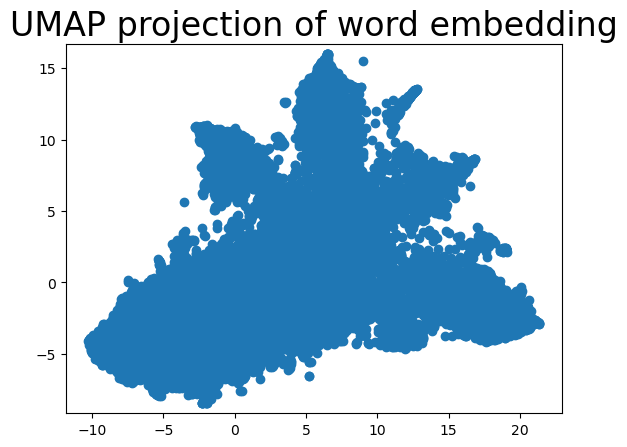

In [173]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
#    c=actual)

#c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of word embedding', fontsize=24);


#### t-SNE

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate='auto', init='pca', perplexity=40).fit_transform(wn)

#embedding = reducer.fit_transform(scaled_data)
print(tsne.shape)


(25510, 2)


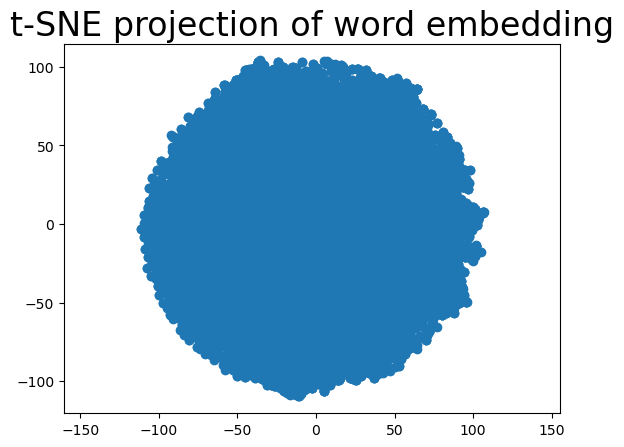

In [175]:
plt.scatter(
    tsne[:, 0],
    tsne[:, 1])
#    c=actual)

#c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]

plt.gca().set_aspect('equal', 'datalim')
plt.title('t-SNE projection of word embedding', fontsize=24);


#### What classes the vocabulary words belong to 

In [131]:
for i in range(1,3):
    a=[i]+[0]*29
    b=tf.constant(a)
    print(b)
    c=model.predict(b)
    print(c)

tf.Tensor([1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(30,), dtype=int32)


ValueError: in user code:

    File "/home/erin/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/home/erin/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/erin/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/home/erin/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/home/erin/miniconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/erin/miniconda3/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model_6' (type Functional).
    
    Input 0 of layer "dense_8" is incompatible with the layer: expected axis -1 of input shape to have value 7680, but received input with shape (None, 256)
    
    Call arguments received by layer 'model_6' (type Functional):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=False
      • mask=None


In [ ]:
import numpy as np

for inputs, targets in int_train_ds:
    print(inputs.shape)
    print(inputs[0])
    print(targets[0])
    # With this test_input variable verify tf.one_hot() transformation
    break
p=model.predict(inputs)
print(p[0])
print(targets[0])

for i in range(100):
    ind=[x for x in inputs[i].numpy() if x >0]
    words=[vc[i] for i in ind]
    print(ind)
    print(words)
    print(np.argmax(p[i]) , np.argmax(targets[i]) )
#target= np.argmax(targets, axis=1)